# AIRLINE CUSTOMER VALUE ANALYSIS

## Feature Description

- MEMBER_NO-b : ID Member
- FFP_DATE : Frequent Flyer Program Join Date
- FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
- GENDER : Jenis Kelamin
- FFP_TIER : Tier dari Frequent Flyer Program
- WORK_CITY : Kota Asal
- WORK_PROVINCE : Provinsi Asal
- WORK_COUNTRY : Negara Asal
- AGE : Umur Customer
- LOAD_TIME : Tanggal data diambil
- FLIGHT_COUNT : Jumlah penerbangan Customer
- BP_SUM : Rencana Perjalanan
- SUM_YR_1 : Fare Revenue
- SUM_YR_2 : Votes Prices
- SEG_KM_SUM : Total jarak(km) penerbangan yg sudah dilakukan
- LAST_FLIGHT_DATE : Tanggal penerbangan terakhir
- LAST_TO_END : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- AVG_INTERVAL : Rata-rata jarak waktu
- MAX_INTERVAL : Maksimal jarak waktu
- EXCHANGE_COUNT : Jumlah penukaran
- avg_discount : Rata rata discount yang didapat customer
- Points_Sum : Jumlah poin yang didapat customer
- Point_NotFlight : point yang tidak digunakan oleh members

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score

# K-Means
from sklearn.cluster import KMeans

# Silhouette Scores
from sklearn.metrics import silhouette_score

# PCA
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## EDA and Business Insight

In [2]:
# Grouping each feature based on each type
nums = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'MAX_INTERVAL', 'AVG_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [3]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [4]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,MAX_INTERVAL,AVG_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,166.033895,67.749788,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,123.397180,77.517866,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,79.000000,23.370370,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,143.000000,44.666667,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,228.000000,82.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [5]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


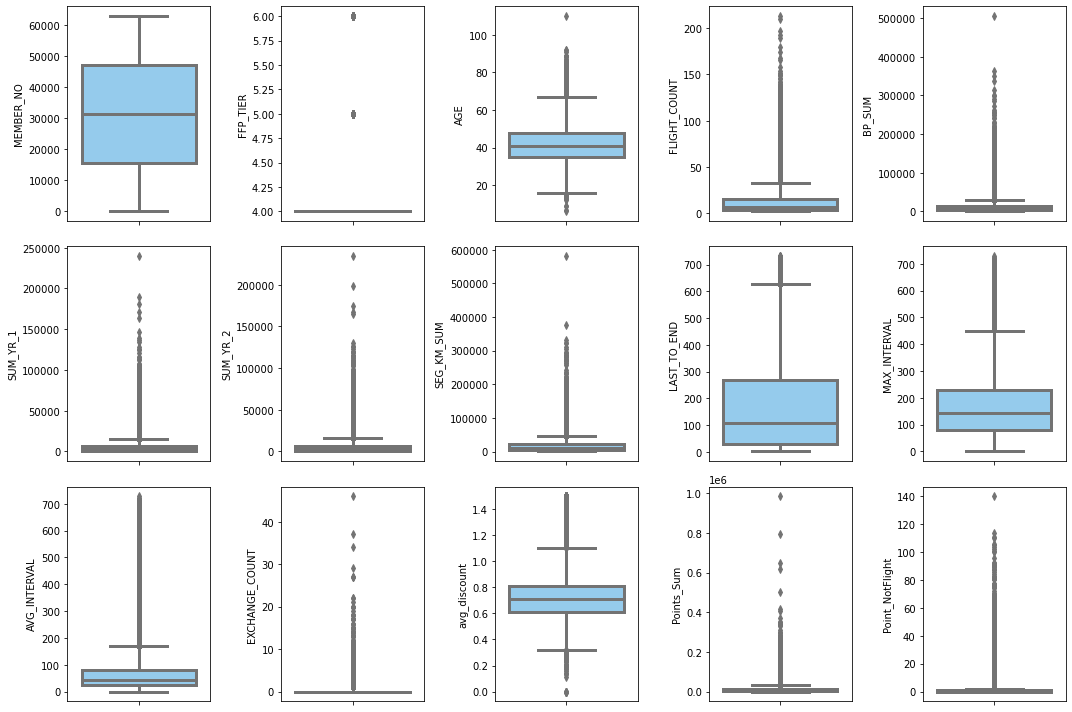

In [6]:
# Boxplot
plt.figure(figsize=(15,10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='lightskyblue', orient='v', linewidth=3)
    plt.tight_layout()

In [7]:
df['FFP_TIER'].value_counts()

4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64

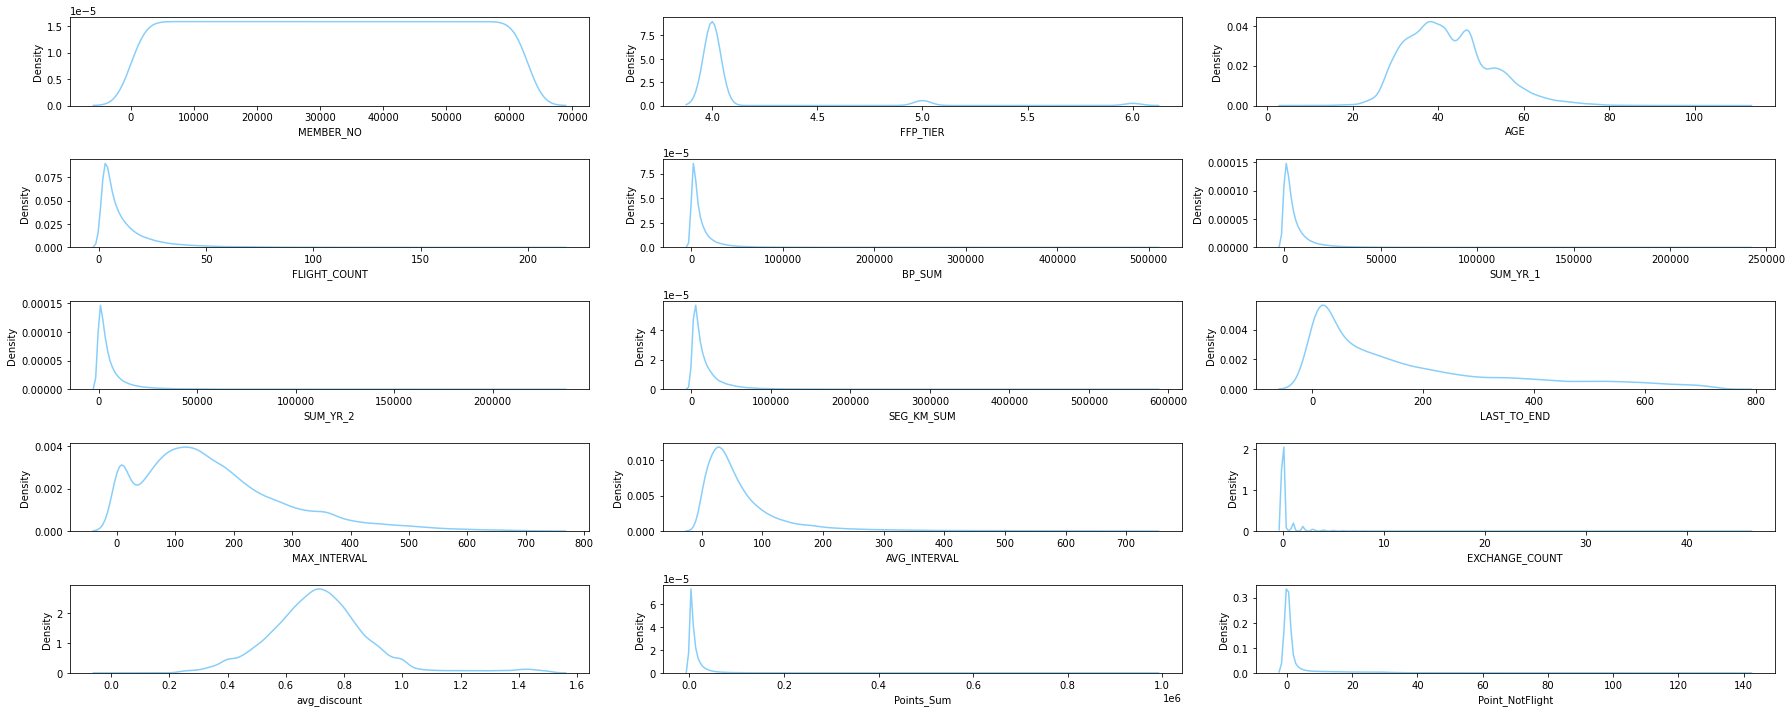

In [8]:
# Distplot
pal = sns.color_palette()
plt.figure(figsize=(25,10))
for i in range(0, len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[nums[i]], color='lightskyblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

<AxesSubplot:>

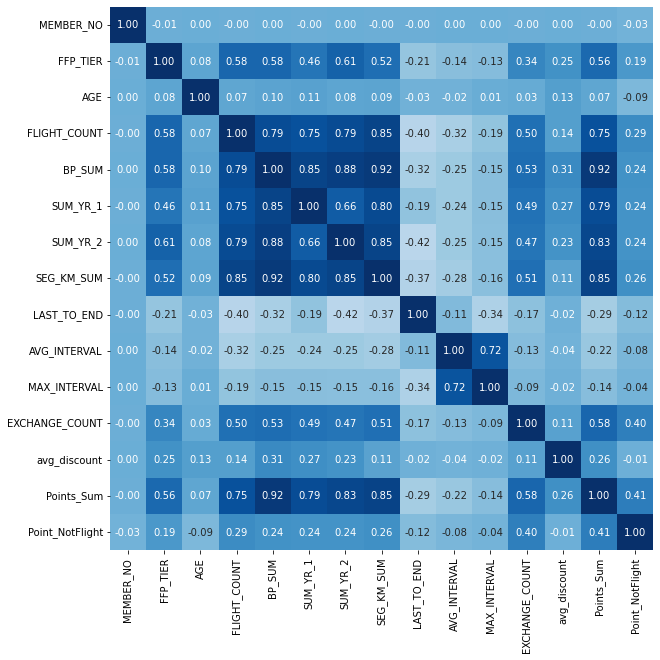

In [9]:
# Correlation for each numerical features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, square=True, cmap='Blues', cbar=False, vmin=-1, vmax=1, fmt='.2f')

Observation result:

1. Hampir setiap fitur terdapat nilai *outlier*
2. Hampir setiap fitur memiliki distribusi *positive skewed*
3. Rata-rata usia customer yang melakukan penerbangan adalah 42, bisa diasumsikan mayoritas customer melakukan perjalanan untuk keperluan bisnis
4. Mayoritas customer memiliki gender laki-laki
5. Mayoritas customer berasal dari Negara China, sehingga dapat diasumsikan bahwa data ini adalah data penerbangan Negara China

Observation from heatmap:

1. Kolom  `MEMBER_NO`, `AGE`, `AVG_INTERVAL`, `MAX_INTERVAL`, `AVG_DISCOUNT`, `Point_NotFlight` memiliki korelasi yang rendah, sehingga memungkinkan untuk tidak menggunakan kolom tersebut.
2. Kolom seperti `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, dan `Points_Sum` memiliki korelasi yang sangat tinggi terhadap setiap kolomnya, memungkinkan memilih salah satu dari kelima kolom tersebut.
3. Walaupun kolom `FFP_TIER` memiliki korelasi yang baik dengan fitur lainnya, namun unique valuenya hanya ada 3 dan cenderung mayoritas berada pada 1 nilai sehingga memungkinkan untuk di drop.

In [10]:
# Drop columns with low correlation
df = df.drop(columns=['MEMBER_NO', 'FFP_TIER', 'AGE', 'AVG_INTERVAL', 'MAX_INTERVAL', 'avg_discount', 'Point_NotFlight'])
df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,EXCHANGE_COUNT,Points_Sum
0,11/2/2006,12/24/2008,Male,.,beijing,CN,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,34,619760
1,2/19/2007,8/3/2007,Male,NaN,beijing,CN,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,29,415768
2,2/1/2007,8/30/2007,Male,.,beijing,CN,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,20,406361
3,8/22/2008,8/23/2008,Male,Los Angeles,CA,US,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,11,372204
4,4/10/2009,4/15/2009,Male,guiyang,guizhou,CN,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,27,338813


## Pre-Processing Data and Feature Engineering

### Handle Missing Value

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62988 non-null  object 
 1   FIRST_FLIGHT_DATE  62988 non-null  object 
 2   GENDER             62985 non-null  object 
 3   WORK_CITY          60719 non-null  object 
 4   WORK_PROVINCE      59740 non-null  object 
 5   WORK_COUNTRY       62962 non-null  object 
 6   LOAD_TIME          62988 non-null  object 
 7   FLIGHT_COUNT       62988 non-null  int64  
 8   BP_SUM             62988 non-null  int64  
 9   SUM_YR_1           62437 non-null  float64
 10  SUM_YR_2           62850 non-null  float64
 11  SEG_KM_SUM         62988 non-null  int64  
 12  LAST_FLIGHT_DATE   62988 non-null  object 
 13  LAST_TO_END        62988 non-null  int64  
 14  EXCHANGE_COUNT     62988 non-null  int64  
 15  Points_Sum         62988 non-null  int64  
dtypes: float64(2), int64(6

In [12]:
df.isna().sum()

FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
EXCHANGE_COUNT          0
Points_Sum              0
dtype: int64

In [13]:
# Make table summary of missing value count with the percentage

null_data = df.isna().sum().reset_index()
null_data.columns = ['feature','missing_value']
null_data['percentage'] = round((null_data['missing_value']/len(df))*100,3)
null_data = null_data.sort_values('percentage', ascending=False).reset_index(drop=True)
null_data = null_data[null_data['percentage']>0]
null_data

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,SUM_YR_2,138,0.219
4,WORK_COUNTRY,26,0.041
5,GENDER,3,0.005


Observation result :

1. Kolom `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `SUM_YR_1`, `SUM_YR_2` memiliki beberapa *missing value*.
2. Kolom `SUM_YR_1` dan `SUM_YR_2` dapat difill dengan nilai mediannya.
3. Baris yang memiliki kolom `WORK_CITY` dan `WORK_PROVINCE` akan dihapus karena cukup besar persentase *missing value*-nya.
4. Kolom `WORK_COUNTRY` dan `GENDER` dapat difill dengan nilai modusnya.
5. Kolom `SUM_YR_1` dan `SUM_YR_2` berdasarkan *correlation heat map* dapat dipertimbangkan untuk di drop. Karena pada kolom tersebut terdapat *missing value* maka akan di drop.
6. Kolom `GENDER`, `WORK_CITY`, `WORK_PROVINCE` dan `WORK_COUNTRY` bukan merupakan jenis numerik sehingga tidak dapat melakukan *imputation*, oleh karena itu akan di drop.

In [14]:
# Fill and drop the rows based on observation result
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())
df['WORK_COUNTRY'] = df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode())
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode())
df = df.dropna(subset=['WORK_CITY', 'WORK_PROVINCE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59240 entries, 0 to 62987
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           59240 non-null  object 
 1   FIRST_FLIGHT_DATE  59240 non-null  object 
 2   GENDER             59237 non-null  object 
 3   WORK_CITY          59240 non-null  object 
 4   WORK_PROVINCE      59240 non-null  object 
 5   WORK_COUNTRY       59239 non-null  object 
 6   LOAD_TIME          59240 non-null  object 
 7   FLIGHT_COUNT       59240 non-null  int64  
 8   BP_SUM             59240 non-null  int64  
 9   SUM_YR_1           59240 non-null  float64
 10  SUM_YR_2           59240 non-null  float64
 11  SEG_KM_SUM         59240 non-null  int64  
 12  LAST_FLIGHT_DATE   59240 non-null  object 
 13  LAST_TO_END        59240 non-null  int64  
 14  EXCHANGE_COUNT     59240 non-null  int64  
 15  Points_Sum         59240 non-null  int64  
dtypes: float64(2), int64(6

In [15]:
# Drop the columns based on observation result
dfn = df.drop(columns=['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'SUM_YR_1', 'SUM_YR_2'])
dfn.head()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,EXCHANGE_COUNT,Points_Sum
0,11/2/2006,12/24/2008,3/31/2014,210,505308,580717,3/31/2014,1,34,619760
2,2/1/2007,8/30/2007,3/31/2014,135,351159,283712,3/21/2014,11,20,406361
3,8/22/2008,8/23/2008,3/31/2014,23,337314,281336,12/26/2013,97,11,372204
4,4/10/2009,4/15/2009,3/31/2014,152,273844,309928,3/27/2014,5,27,338813
5,2/10/2008,9/29/2009,3/31/2014,92,313338,294585,1/13/2014,79,10,343121


### Handle Duplicated Data

In [16]:
dfn.duplicated().sum()

91

Tidak ada data yang terduplikasi

### Handle Data Type

In [17]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59240 entries, 0 to 62987
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FFP_DATE           59240 non-null  object
 1   FIRST_FLIGHT_DATE  59240 non-null  object
 2   LOAD_TIME          59240 non-null  object
 3   FLIGHT_COUNT       59240 non-null  int64 
 4   BP_SUM             59240 non-null  int64 
 5   SEG_KM_SUM         59240 non-null  int64 
 6   LAST_FLIGHT_DATE   59240 non-null  object
 7   LAST_TO_END        59240 non-null  int64 
 8   EXCHANGE_COUNT     59240 non-null  int64 
 9   Points_Sum         59240 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 5.0+ MB


Beberapa fitur yang merupakan penanggalan masih dalam bentuk *string* atau *object*

In [18]:
dates = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']
dfn[dates] = dfn[dates].astype('category')

# Change out of range date
dfn['LAST_FLIGHT_DATE'] = dfn['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [19]:
# Change some columns data type to date
dfn['LOAD_TIME'] = pd.to_datetime(dfn['LOAD_TIME'])
dfn['FFP_DATE'] = pd.to_datetime(dfn['FFP_DATE'])
dfn['FIRST_FLIGHT_DATE'] = pd.to_datetime(dfn['FIRST_FLIGHT_DATE'])
dfn['LAST_FLIGHT_DATE'] = pd.to_datetime(dfn['LAST_FLIGHT_DATE'])
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59240 entries, 0 to 62987
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           59240 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  59240 non-null  datetime64[ns]
 2   LOAD_TIME          59240 non-null  category      
 3   FLIGHT_COUNT       59240 non-null  int64         
 4   BP_SUM             59240 non-null  int64         
 5   SEG_KM_SUM         59240 non-null  int64         
 6   LAST_FLIGHT_DATE   59240 non-null  datetime64[ns]
 7   LAST_TO_END        59240 non-null  int64         
 8   EXCHANGE_COUNT     59240 non-null  int64         
 9   Points_Sum         59240 non-null  int64         
dtypes: category(1), datetime64[ns](3), int64(6)
memory usage: 4.6 MB


Data type kolom `LOAD_TIME` masih berupa kategori

In [20]:
dfn['LOAD_TIME'] = dfn['LOAD_TIME'].values.astype('datetime64[ns]')
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59240 entries, 0 to 62987
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           59240 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  59240 non-null  datetime64[ns]
 2   LOAD_TIME          59240 non-null  datetime64[ns]
 3   FLIGHT_COUNT       59240 non-null  int64         
 4   BP_SUM             59240 non-null  int64         
 5   SEG_KM_SUM         59240 non-null  int64         
 6   LAST_FLIGHT_DATE   59240 non-null  datetime64[ns]
 7   LAST_TO_END        59240 non-null  int64         
 8   EXCHANGE_COUNT     59240 non-null  int64         
 9   Points_Sum         59240 non-null  int64         
dtypes: datetime64[ns](4), int64(6)
memory usage: 5.0 MB


### Feature Selection

Salah satu metode segmentasi di industri adalah model RFM, dimana:
1. R - Recency - kebaruan : Kapan terakhir?

2. F - Frequency - frekuensi : Seberapa sering?

3. M - Monetary - nilai moneter : Berapa banyak (nilai uang) yang dikeluarkan?

dan dari fitur yang tersisa:

- Recency = dapat menggunakan kolom `LAST_TO_END` dan kolom tersebut tidak termasuk kedalam fitur yang berkolerasi rendah.

- Frequency = dapat menggunakan kolom yang berjenis date seperti `FIRST_FLIGHT_DATE` ; `LAST_FLIGHT_DATE` dan `FLIGHT_COUNT`. Kolom-kolom tersebut tidak termasuk kedalam fitur yang berkolerasi rendah.

- Monetary = dapat menggunakan kolom salah satu diantara `BP_SUM`, `SEG_KM_SUM`, atau `Points_Sum` karena ketiga kolom tersebut berkolerasi kuat satu sama lain. Dilihat dari korelasinya dengan `FLIGHT_COUNT`, kolom `SEG_KM_SUM` akan dipilih

- Kolom `FFP_DATE` dan `LOAD_TIME` dapat dibuat menjadi sebuah fitur baru yaitu lamanya customer bergabung kedalam program member (*frequent flyer*)

In [21]:
# Drop columns that we don't need
dfs = dfn.drop(columns=['BP_SUM', 'EXCHANGE_COUNT', 'Points_Sum'])
dfs.head()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END
0,2006-11-02,2008-12-24,2014-03-31,210,580717,2014-03-31,1
2,2007-02-01,2007-08-30,2014-03-31,135,283712,2014-03-21,11
3,2008-08-22,2008-08-23,2014-03-31,23,281336,2013-12-26,97
4,2009-04-10,2009-04-15,2014-03-31,152,309928,2014-03-27,5
5,2008-02-10,2009-09-29,2014-03-31,92,294585,2014-01-13,79


### Feature Extraction

Dari kolom `FIRST_FLIGHT_DATE`, `LAST_FLIGHT_DATE` dan `FLIGHT_COUNT` dapat dibuat fitur baru yaitu jumlah penerbangan per tahunnya.

In [22]:
dfs['FLIGHT_PER_YEAR'] = dfs['FLIGHT_COUNT'] / ((dfs['LAST_FLIGHT_DATE'] - dfs['FIRST_FLIGHT_DATE']) / np.timedelta64(1,'Y'))
dfs = dfs.drop(columns=['FLIGHT_COUNT', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE'])
dfs.head()

,FFP_DATE,LOAD_TIME,SEG_KM_SUM,LAST_TO_END,FLIGHT_PER_YEAR
0,2006-11-02,2014-03-31,580717,1,39.886076
2,2007-02-01,2014-03-31,283712,11,20.587782
3,2008-08-22,2014-03-31,281336,97,4.305780
4,2009-04-10,2014-03-31,309928,5,30.723221
5,2008-02-10,2014-03-31,294585,79,21.443720


Dari kolom `FFP_DATE` dan `LOAD_TIME` dapat dibuat fitur baru yaitu durasi customer mengikuti program member (*frequent flyer*)

In [23]:
dfs['MEMBER_DURATION'] = (((dfs['LOAD_TIME'] - dfs['FFP_DATE'])) / np.timedelta64(1, 'D')).astype(np.int64)
dfs = dfs.drop(columns=['FFP_DATE', 'LOAD_TIME'])
dfs.head()

,SEG_KM_SUM,LAST_TO_END,FLIGHT_PER_YEAR,MEMBER_DURATION
0,580717,1,39.886076,2706
2,283712,11,20.587782,2615
3,281336,97,4.305780,2047
4,309928,5,30.723221,1816
5,294585,79,21.443720,2241


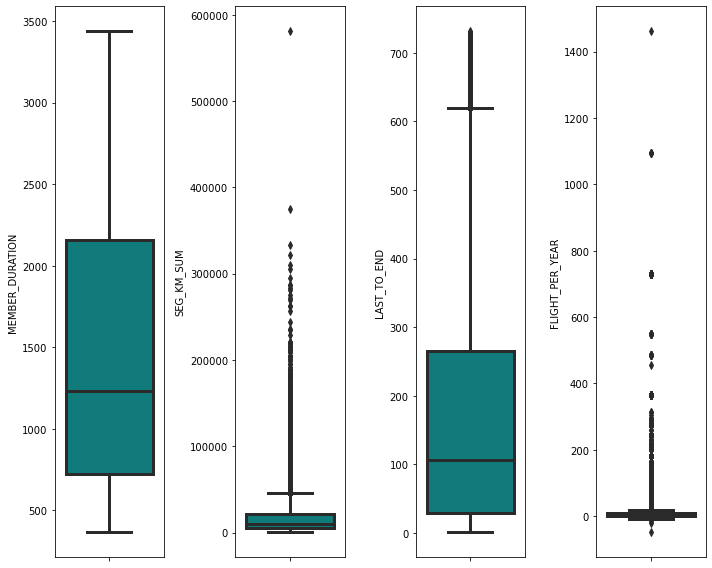

In [24]:
feat_dfs = ['MEMBER_DURATION', 'SEG_KM_SUM', 'LAST_TO_END', 'FLIGHT_PER_YEAR']
plt.figure(figsize=(10,8))
for i in range(0, len(feat_dfs)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=dfs[feat_dfs[i]], color='darkcyan', orient='v', linewidth=3)
    plt.tight_layout()

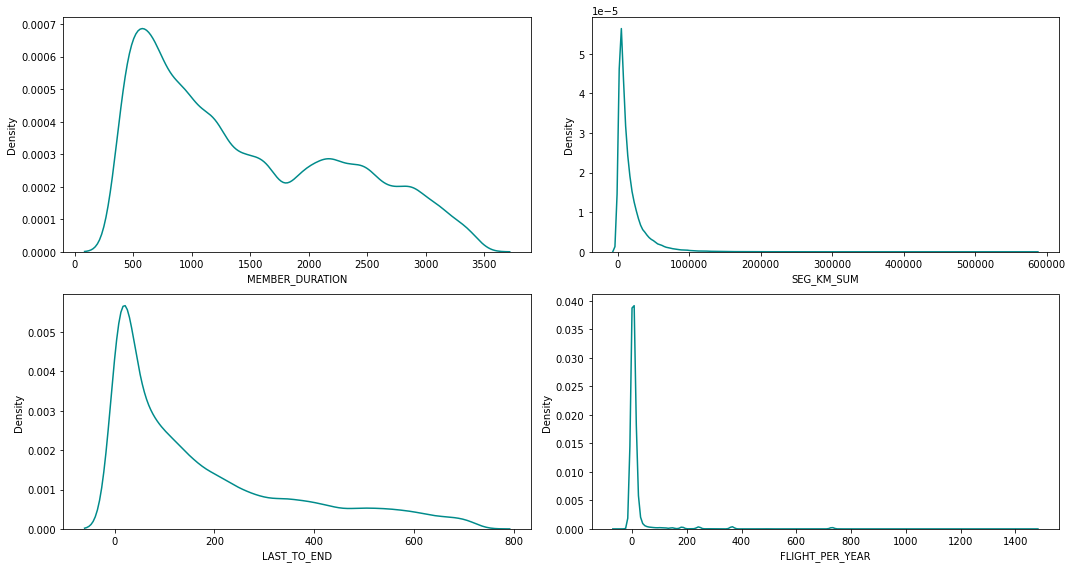

In [25]:
plt.figure(figsize=(15,8))
for i in range(0, len(feat_dfs)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=dfs[feat_dfs[i]], color='darkcyan')
    plt.xlabel(feat_dfs[i])
    plt.tight_layout()

### Handle Outliers

In [26]:
print(f'Jumlah baris sebelum memfilter outlier: {len(dfs)}')

filtered_entries = np.array([True] * len(dfs))
for col in ['MEMBER_DURATION', 'SEG_KM_SUM', 'LAST_TO_END', 'FLIGHT_PER_YEAR']:
    Q1 = dfs[col].quantile(0.25)
    Q3 = dfs[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((dfs[col] >= low_limit) & (dfs[col] <= high_limit)) & filtered_entries
    
dfs_IQR = dfs[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfs_IQR)}')

Jumlah baris sebelum memfilter outlier: 59240
Jumlah baris setelah memfilter outlier: 48409


### Feature Transformation

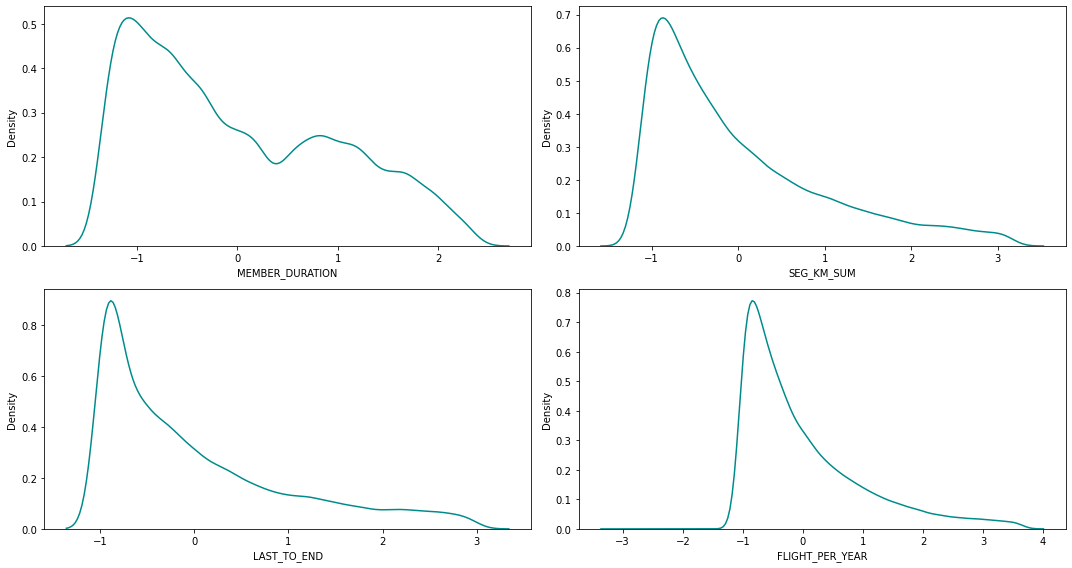

In [27]:
feat_std = ['MEMBER_DURATION', 'SEG_KM_SUM', 'LAST_TO_END', 'FLIGHT_PER_YEAR']
X = dfs_IQR[feat_std]

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

dfs_std = pd.DataFrame(X_std, columns=feat_std)

plt.figure(figsize=(15,8))
for i in range(0, len(feat_std)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=dfs_std[feat_std[i]], color='darkcyan')
    plt.xlabel(feat_std[i])
    plt.tight_layout()

## K-Means Clustering

### Elbow Method

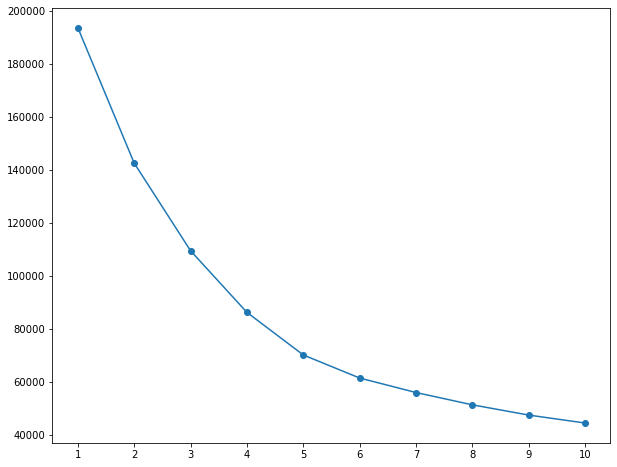

In [28]:
inertia = []

km = range(1,11)
for i in km :
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
    kmeans.fit(dfs_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(km, inertia, '-o')
plt.xticks(km)
plt.style.use('ggplot')
plt.show()

### Silhouette Score

In [29]:
for i in range(2,7) :
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(dfs_std)
    inertia.append(kmeans.inertia_)
    preds = kmeans.predict(dfs_std)

    score = silhouette_score(dfs_std, preds, metric='mahalanobis')
    print (f'For n_clusters = {i}. The average silhouette_score is : {score}')

For n_clusters = 2. The average silhouette_score is : 0.19915212647975808
For n_clusters = 3. The average silhouette_score is : 0.2086589609259082
For n_clusters = 4. The average silhouette_score is : 0.2545043891272714
For n_clusters = 5. The average silhouette_score is : 0.2805823725104401
For n_clusters = 6. The average silhouette_score is : 0.27557805640081623


Dari hasil diatas didapat, cluster terbaik yaitu 5

### K-Means Model

In [30]:
# Create kmeans model and assign cluster
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42).fit(dfs_std)

cluster = kmeans.labels_
dfs_std = dfs_std.assign(Cluster = cluster)
dfs_IQR = dfs_IQR.assign(Cluster = cluster)

In [31]:
dfs_std.head()

,MEMBER_DURATION,SEG_KM_SUM,LAST_TO_END,FLIGHT_PER_YEAR,Cluster
0,-0.327300,3.047434,-0.574907,0.909856,0
1,2.134460,2.955477,-0.730342,-0.268386,0
2,-0.987801,2.963373,-0.989400,2.881450,4
3,1.262259,2.883163,-0.833965,0.093418,0
4,1.582832,3.152871,-0.814536,0.006922,0


In [32]:
dfs_IQR.head()

,SEG_KM_SUM,LAST_TO_END,FLIGHT_PER_YEAR,MEMBER_DURATION,Cluster
1256,44870,68,8.331261,1216,0
1296,43915,44,3.492756,3251,0
1304,43997,4,16.427699,670,4
1326,43164,28,4.978522,2530,0
1327,45965,31,4.623323,2795,0


## PCA

In [33]:
pca = PCA(n_components=2).fit_transform(dfs_std)
pdf = pd.DataFrame(data = pca, columns = ['pc1', 'pc2'])
pdf['Clusters'] = cluster
pdf

,pc1,pc2,Clusters
0,-1.677379,2.888387,0
1,-3.288993,1.742414,0
2,2.201653,4.013327,4
3,-2.759647,2.134008,0
4,-2.990272,2.177460,0
...,...,...,...
48404,-0.203251,-0.820734,2
48405,1.116890,-1.613108,3
48406,0.330201,-1.038726,2
48407,2.282727,0.912437,4


### Visualization with Scatterplot

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

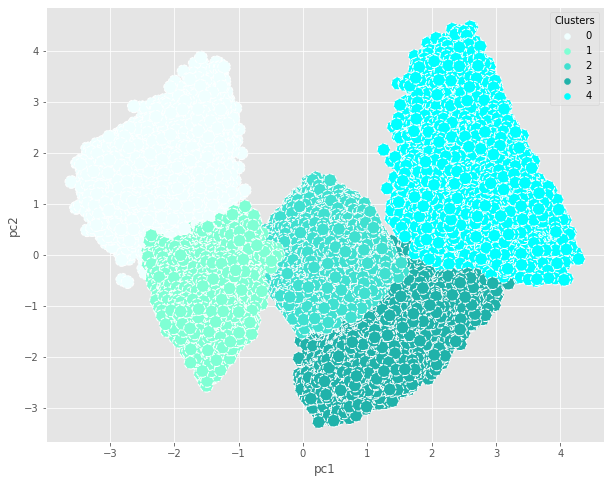

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
pal = ['azure', 'aquamarine', 'turquoise', 'lightseagreen', 'cyan']

sns.scatterplot(
    x='pc1', 
    y='pc2',
    hue='Clusters',
    linestyle='--',
    data=pdf,
    palette=pal,
    s=160,
    ax=ax
)

## Cluster Interpretation

In [35]:
# Assign cluster to original dataframe after feature selection
dfc = dfs_IQR.copy()
dfc = dfc.assign(Cluster = cluster)
dfc.shape

(48409, 5)

In [36]:
total_customer = dfc['Cluster'].value_counts().reset_index()
total_customer.columns = ['Cluster', 'Total']
total_customer['Percentage'] = round((total_customer['Total'] / len(dfc)) * 100, 2)
total_customer = total_customer.sort_values(by = 'Cluster', ascending = True).reset_index(drop = True)
total_customer

,Cluster,Total,Percentage
0,0,6976,14.41
1,1,11118,22.97
2,2,15438,31.89
3,3,7791,16.09
4,4,7086,14.64


In [37]:
dfcg = dfc.groupby('Cluster').agg('mean', 'median', 'mode')
dfcg2 = dfcg.merge(total_customer,
                  how = 'inner',
                  left_on = 'Cluster',
                  right_on = 'Cluster')
dfcg2

,Cluster,SEG_KM_SUM,LAST_TO_END,FLIGHT_PER_YEAR,MEMBER_DURATION,Total,Percentage
0,0,31064.496846,56.678039,4.957403,1981.432053,6976,14.41
1,1,10012.297895,113.866793,1.552998,2448.370840,11118,22.97
2,2,8813.812476,105.301917,3.852702,928.454981,15438,31.89
3,3,5992.440637,433.284431,3.083881,1458.916699,7791,16.09
4,4,18241.366356,130.722975,12.289130,736.599069,7086,14.64


Terdapat 5 cluster (segmentasi customer) dengan jumlah customer dari masing-masing cluster sebagai berikut:

1. Cluster 0 berjumlah 6976 customer atau 14.41% dari total customer
2. Cluster 1 berjumlah 11118 customer atau 22.97% dari total customer
3. Cluster 2 berjumlah 15438 customer atau 31.89% dari total customer
4. Cluster 3 berjumlah 7791 customer atau 16.09% dari total customer
5. Cluster 4 berjumlah 7086 customer atau 14.64% dari total customer

mayoritas customer berada pada cluster 2

Berdasarkan hasil yang telah didapat, karakteristik dari setiap cluster adalah sebagai berikut:

1. Cluster 0 :

Cluster ini merupakan segmen customer dimana telah cukup lama mengikuti *frequent flyer program*, melakukan penerbangan secara moderat, memiliki nilai moneter yang paling tinggi dilihat dari total jarak tempuhnya, memiliki *recency* yang baik dilihat dari kebaruannya dalam menggunakan maskapai ini. Cluster ini dapat disebut **PRIORITY** Customer.

2. Cluster 1 :

Cluster ini merupakan segmen customer dimana paling lama mengikuti *frequent flyer program*, namun jarang melakukan penerbangan, memiliki nilai moneter yang moderat dilihat dari total jarak tempuhnya, memiliki *recency* yang moderat dilihat dari kebaruannya dalam menggunakan maskapai. Cluster ini dapat disebut **LOYAL-MODERATE** Customer.

3. Cluster 2 :

Cluster ini merupakan segmen customer yang cukup baru mengikuti *frequent flyer program*, cukup moderat frekuensi penerbangannya, memiliki nilai moneter yang tidak terlalu buruk dilihat dari total jarak tempuhnya, memiliki *recency* yang cukup baik dilihat dari kebaruannya dalam menggunakan maskapai. Cluster ini dapat disebut **POTENTIAL LOYAL-MODERATE** Customer.

4. Cluster 3 :

Cluster ini merupakan segmen customer yang sudah cukup lama mengikuti *frequent flyer program*, cukup moderat frekuensi penerbangannya, namun memiliki nilai moneter yang paling rendah. Dilihat dari *recency* yang buruk, kemungkinan customer pada cluster ini memiliki potensi sebagai **LOYAL-MODERATE** customer diawal namun sudah atau akan meninggalkan jasa maskapai ini. Cluster ini dapat disebut **LOW VALUE** Customer. 

5. Cluster 4 :

Cluster ini merupakan segmen customer yang paling baru dilihat dari lama waktu mengikuti *frequent flyer program*, memiliki frekuensi penerbangan yang paling baik, nilai moneter yang cukup baik, dan memiliki *recency* yang tidak terlalu buruk. Dengan frekuensi yang sangat baik dan nilai moneter yang cukup baik walaupun merupakan member baru, cluster ini dapat disebut **POTENTIAL-PRIORITY** customer.

## Business Strategy Recommendations

Berdasarkan hasil interpretasi segmentasi customer, berikut adalah beberapa rekomendasi bisnis yang dapat diberikan :

1. **PRIORITY** customer perlu benar-benar diperhatikan sebagai prioritas utama. Cluster ini memberikan kontribusi yang paling besar terhadap maskapai. Salah satu strategi yang dapat dilakukan adalah dengan memberikan program reward. Demi keuntungan maskapai juga, program reward ini bisa digabungkan dengan program referral untuk sekaligus mempromosikan brand maskapai kepada masyarakat umum. 
2. **LOYAL-MODERATE** customer merupakan cluster yang paling loyal. Dilihat dari data, cluster ini memiliki potensi yang cukup baik, namun dilihat dari frekuensi penerbangannya memang kurang baik. Salah satu strategi yang dapat digunakan adalah dengan memberikan beberapa program yang lebih ke arah meningkatkan engagement customer untuk menggunakan maskapai, bisa dengan memberikan promo dengan bumbu bahwa cluster ini merupakan customer loyal.
3. **POTENTIAL LOYAL-MODERATE** customer merupakan cluster yang memiliki potensi untuk menjadi cluster 1. Dengan memberikan pelayanan yang baik selama penerbangan dan memberikan beberapa promo walaupun tidak dalam frekuensi yang banyak, memungkinan customer tersebut meningkatkan frekuensi penerbangannya dan menjadi customer loyal.
4. **LOW-VALUE** customer ini bisa diindikasikan customer yang memang menggunakan maskapai hanya pada waktu tertentu atau memang sudah meninggalkan menggunakan maskapai ini dilihat dari frekuensinya yang dinilai masih cukup baik walaupun *recency* nya paling buruk. Salah satu strategi yang dapat dilakukan untuk dapat menarik kembali customer seperti ini adalah dengan memberikan *comeback promo*.
5. **POTENTIAL-PRIORITY** customer ini merupakan paling baru namun dilihat dari datanya, memiliki potensi untuk memberikan kontribusi sangat besar terhadap maskapai. Salah satu strategi yang bisa dilakukan adalah dengan memberikan program khusus lainnya yang bersifat jangka panjang yang memfokuskan untuk mempertahankan customer menjadi customer loyal.